# EDA and modeling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## EDA

In [2]:
files =os.listdir('./temperature and precipitation/')
files

['USW00003822.csv',
 'USW00024286.csv',
 'USW00013833.csv',
 'USW00023066.csv',
 'USW00093821.csv',
 'USW00024127.csv',
 'USW00014972.csv',
 'USW00013984.csv',
 'USW00003017.csv',
 'USW00014768.csv',
 'USW00013985.csv',
 'USW00094815.csv',
 'USW00093820.csv',
 'USW00094008.csv',
 'USW00094746.csv',
 'USW00094949.csv',
 'USW00094236.csv',
 'USW00023271.csv',
 'USW00014839.csv',
 'USW00023065.csv',
 'consolidated_df.csv',
 'USW00093822.csv',
 'USW00014742.csv',
 'USW00003940.csv',
 'USW00024131.csv',
 'USC00042863.csv',
 'USW00003820.csv',
 'USW00024257.csv',
 'USW00003171.csv',
 'USW00024121.csv',
 'USW00013996.csv',
 'USW00014753.csv',
 'USW00003945.csv',
 'USW00013968.csv',
 'USW00094973.csv',
 'USW00094224.csv',
 'USW00023275.csv',
 'USW00093824.csv',
 'USW00013942.csv',
 'USW00014778.csv',
 'USW00014750.csv',
 'USW00013995.csv',
 'USW00003953.csv',
 'USW00003947.csv',
 'USW00014745.csv',
 'USW00013994.csv',
 'USC00286055.csv',
 'USW00013957.csv',
 'USW00014792.csv',
 'USW00093819.cs

In [3]:
files.remove('.ipynb_checkpoints')


In [4]:
files

['USW00003822.csv',
 'USW00024286.csv',
 'USW00013833.csv',
 'USW00023066.csv',
 'USW00093821.csv',
 'USW00024127.csv',
 'USW00014972.csv',
 'USW00013984.csv',
 'USW00003017.csv',
 'USW00014768.csv',
 'USW00013985.csv',
 'USW00094815.csv',
 'USW00093820.csv',
 'USW00094008.csv',
 'USW00094746.csv',
 'USW00094949.csv',
 'USW00094236.csv',
 'USW00023271.csv',
 'USW00014839.csv',
 'USW00023065.csv',
 'consolidated_df.csv',
 'USW00093822.csv',
 'USW00014742.csv',
 'USW00003940.csv',
 'USW00024131.csv',
 'USC00042863.csv',
 'USW00003820.csv',
 'USW00024257.csv',
 'USW00003171.csv',
 'USW00024121.csv',
 'USW00013996.csv',
 'USW00014753.csv',
 'USW00003945.csv',
 'USW00013968.csv',
 'USW00094973.csv',
 'USW00094224.csv',
 'USW00023275.csv',
 'USW00093824.csv',
 'USW00013942.csv',
 'USW00014778.csv',
 'USW00014750.csv',
 'USW00013995.csv',
 'USW00003953.csv',
 'USW00003947.csv',
 'USW00014745.csv',
 'USW00013994.csv',
 'USC00286055.csv',
 'USW00013957.csv',
 'USW00014792.csv',
 'USW00093819.cs

In [5]:
file_list=[]
for file in files:
    df=pd.read_csv('./temperature and precipitation/'+file, index_col=None)
    df['filename']=os.path.basename(file)
    file_list.append(df)
    
frame =pd.concat(file_list, axis=0, ignore_index=True)
#https://stackoverflow.com/questions/41857659/python-pandas-add-filename-column-csv
#https://stackoverflow.com/questions/66431680/combine-multiple-csv-files-datasets-to-make-a-joint-one

In [6]:
frame['filename']=frame['filename'].str.replace('.csv','')

<ipython-input-6-309efc490c64>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['filename']=frame['filename'].str.replace('.csv','')


In [7]:
frame.head()

,Unnamed: 0,Date,tmax,tmin,prcp,filename,Unnamed: 0.1
0,1,1871-01-01,NaN,NaN,0.0,USW00003822,NaN
1,2,1871-01-02,NaN,NaN,0.0,USW00003822,NaN
2,3,1871-01-03,NaN,NaN,0.0,USW00003822,NaN
3,4,1871-01-04,NaN,NaN,0.0,USW00003822,NaN
4,5,1871-01-05,NaN,NaN,0.0,USW00003822,NaN


In [8]:
frame.to_csv('./temperature and precipitation/consolidated_df.csv')

In [4]:
frame=pd.read_csv('./temperature and precipitation/consolidated_df.csv')
frame.head()

,Unnamed: 0,Unnamed: 0.1,Date,tmax,tmin,prcp,filename,Unnamed: 0.1.1
0,0,1,1871-01-01,NaN,NaN,0.0,USW00003822,NaN
1,1,2,1871-01-02,NaN,NaN,0.0,USW00003822,NaN
2,2,3,1871-01-03,NaN,NaN,0.0,USW00003822,NaN
3,3,4,1871-01-04,NaN,NaN,0.0,USW00003822,NaN
4,4,5,1871-01-05,NaN,NaN,0.0,USW00003822,NaN


In [5]:
frame.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'], inplace=True)

In [6]:
frame.shape

(20798528, 5)

In [7]:
frame.isnull().sum()

Date              0
tmax        1167008
tmin        1165210
prcp        1050446
filename          0
dtype: int64

In [8]:
frame.dtypes

Date         object
tmax        float64
tmin        float64
prcp        float64
filename     object
dtype: object

In [9]:
imp = SimpleImputer(strategy='mean')
features=['tmax','tmin','prcp']
imp_frame=imp.fit_transform(frame[features])
imp_df=pd.DataFrame(imp_frame, columns = frame[features].columns)

In [10]:
imp_df.isnull().sum()

tmax    0
tmin    0
prcp    0
dtype: int64

In [11]:
new_df=pd.concat([imp_df,frame[['Date','filename']]], axis=1)
new_df.head()

,tmax,tmin,prcp,Date,filename
0,65.7302,44.681459,0.0,1871-01-01,USW00003822
1,65.7302,44.681459,0.0,1871-01-02,USW00003822
2,65.7302,44.681459,0.0,1871-01-03,USW00003822
3,65.7302,44.681459,0.0,1871-01-04,USW00003822
4,65.7302,44.681459,0.0,1871-01-05,USW00003822


In [12]:
new_df.to_csv('./temperature and precipitation/cleaned_data.csv')

In [13]:
new_df['tmid']=(new_df['tmax']+new_df['tmin'])/2

In [14]:
new_df.head()

,tmax,tmin,prcp,Date,filename,tmid
0,65.7302,44.681459,0.0,1871-01-01,USW00003822,55.205829
1,65.7302,44.681459,0.0,1871-01-02,USW00003822,55.205829
2,65.7302,44.681459,0.0,1871-01-03,USW00003822,55.205829
3,65.7302,44.681459,0.0,1871-01-04,USW00003822,55.205829
4,65.7302,44.681459,0.0,1871-01-05,USW00003822,55.205829


,tmax,tmin,prcp,tmid,if_prcp
Date,,,,,
1851-01-31,65.730200,44.681459,0.000968,55.205829,0.064516
1851-02-28,65.730200,44.681459,0.054286,55.205829,0.214286
1851-03-31,65.730200,44.681459,0.010968,55.205829,0.129032
1851-04-30,65.730200,44.681459,0.029000,55.205829,0.166667
1851-05-31,65.730200,44.681459,0.022903,55.205829,0.161290
...,...,...,...,...,...
2020-08-31,87.787209,65.011420,0.104333,76.399314,0.281720
2020-09-30,79.515272,57.096080,0.098852,68.305676,0.251905
2020-10-31,68.089961,45.949511,0.091803,57.019736,0.277266


In [22]:
new_df.head()

,tmax,tmin,prcp,filename,tmid,if_prcp
Date,,,,,,
1871-01-01,65.7302,44.681459,0.0,USW00003822,55.205829,0
1871-01-02,65.7302,44.681459,0.0,USW00003822,55.205829,0
1871-01-03,65.7302,44.681459,0.0,USW00003822,55.205829,0
1871-01-04,65.7302,44.681459,0.0,USW00003822,55.205829,0
1871-01-05,65.7302,44.681459,0.0,USW00003822,55.205829,0


In [23]:
new_df['prcp'].value_counts()

0.000000     13989250
0.094554      1050446
0.010000       567522
0.020000       414226
0.030000       291878
               ...   
22.750000           2
9.300000            2
9.020000            2
6.090000            2
15.290000           2
Name: prcp, Length: 930, dtype: int64

In [16]:
new_df['if_prcp']=(new_df['prcp']>0).astype(int)
new_df.head()

,tmax,tmin,prcp,Date,filename,tmid,if_prcp
0,65.7302,44.681459,0.0,1871-01-01,USW00003822,55.205829,0
1,65.7302,44.681459,0.0,1871-01-02,USW00003822,55.205829,0
2,65.7302,44.681459,0.0,1871-01-03,USW00003822,55.205829,0
3,65.7302,44.681459,0.0,1871-01-04,USW00003822,55.205829,0
4,65.7302,44.681459,0.0,1871-01-05,USW00003822,55.205829,0


In [17]:
new_df['if_prcp'].value_counts()

0    13989250
1     6809278
Name: if_prcp, dtype: int64

In [57]:
new_df.shape

(20798528, 7)

In [59]:
new_df.head(1)

,tmax,tmin,prcp,Date,filename,tmid,if_prcp
0,65.7302,44.681459,0.0,1871-01-01,USW00003822,55.205829,0


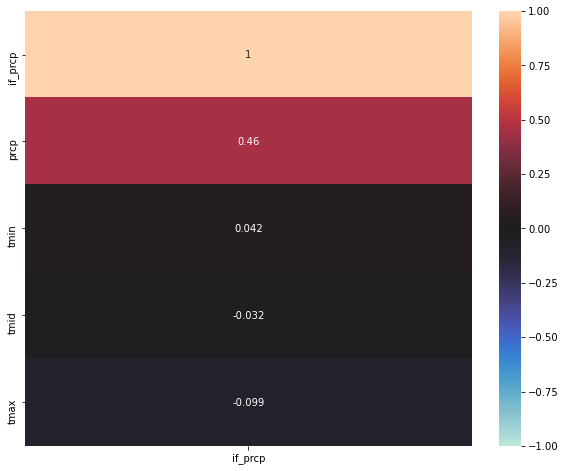

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr()[['if_prcp']].sort_values(by='if_prcp', ascending=False),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='icefire');

In [ ]:
new_df.set_index('Date', inplace = True)
new_df.index=pd.to_datetime(new_df.index)
new_df.resample('1M').mean()

In [24]:
new_df.to_csv('./temperature and precipitation/monthly.csv')

In [26]:
drought=pd.read_csv('./temperature and precipitation/drought1871.csv')

drought.head()

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,ClimateDivisionsID
0,20211214,Central,0.00,0.00,0.00,"1,057.49","7,663.36","13,493.12",2021-12-14,2021-12-20,2,2404
1,20211214,Central,"2,607.81","4,372.41",0.00,0.00,0.00,0.00,2021-12-14,2021-12-20,2,4604
2,20211214,Cheyenne & Niobrara Drainage,0.00,"1,848.56","4,515.72",981.97,0.00,0.00,2021-12-14,2021-12-20,2,4807
3,20211214,East Central,115.62,"5,459.76",0.00,0.00,0.00,0.00,2021-12-14,2021-12-20,2,3206
4,20211214,Extreme Southern,0.00,0.00,0.00,"2,841.68","5,553.79","1,586.81",2021-12-14,2021-12-20,2,2604


In [27]:
drought.tail()

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,ClimateDivisionsID
409117,20000104,South Central,0.00,"5,651.76",111.22,0.00,0.00,0.00,2000-01-04,2000-01-10,2,3908
409118,20000104,South Central,"16,840.81",0.00,0.00,0.00,0.00,0.00,2000-01-04,2000-01-10,2,4204
409119,20000104,Southeast,0.00,0.00,"5,415.06",0.00,0.00,0.00,2000-01-04,2000-01-10,2,1309
409120,20000104,Southeast,0.00,11.11,"5,643.18","1,055.44",0.00,0.00,2000-01-04,2000-01-10,2,2509
409121,20000104,Southeast Desert Basin,"36,001.11","9,632.78",0.00,0.00,0.00,0.00,2000-01-04,2000-01-10,2,407


In [28]:
drought.shape

(409122, 12)

In [30]:
drought.set_index('ValidStart', inplace=True)
drought.index = pd.to_datetime(drought.index)


KeyError: "None of ['ValidStart'] are in the columns"

In [31]:
drought.head()

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidEnd,StatisticFormatID,ClimateDivisionsID
ValidStart,,,,,,,,,,,
2021-12-14,20211214,Central,0.00,0.00,0.00,"1,057.49","7,663.36","13,493.12",2021-12-20,2,2404
2021-12-14,20211214,Central,"2,607.81","4,372.41",0.00,0.00,0.00,0.00,2021-12-20,2,4604
2021-12-14,20211214,Cheyenne & Niobrara Drainage,0.00,"1,848.56","4,515.72",981.97,0.00,0.00,2021-12-20,2,4807
2021-12-14,20211214,East Central,115.62,"5,459.76",0.00,0.00,0.00,0.00,2021-12-20,2,3206
2021-12-14,20211214,Extreme Southern,0.00,0.00,0.00,"2,841.68","5,553.79","1,586.81",2021-12-20,2,2604


In [36]:
drought.resample('1M').mean()

,MapDate,StatisticFormatID,ClimateDivisionsID
ValidStart,,,
2000-01-31,20000114.5,2.0,2578.904762
2000-02-29,20000215.0,2.0,2578.904762
2000-03-31,20000317.5,2.0,2578.904762
2000-04-30,20000414.5,2.0,2578.904762
2000-05-31,20000516.0,2.0,2578.904762
...,...,...,...
2021-08-31,20210817.0,2.0,2578.904762
2021-09-30,20210917.5,2.0,2578.904762
2021-10-31,20211015.5,2.0,2578.904762


,MapDate,Region,None,D0,D1,D2,D3,D4,ValidEnd,StatisticFormatID,ClimateDivisionsID
ValidStart,,,,,,,,,,,
2021-12-14,20211214,Central,0.00,0.00,0.00,"1,057.49","7,663.36","13,493.12",2021-12-20,2,2404
2021-12-14,20211214,Central,"2,607.81","4,372.41",0.00,0.00,0.00,0.00,2021-12-20,2,4604
2021-12-14,20211214,Cheyenne & Niobrara Drainage,0.00,"1,848.56","4,515.72",981.97,0.00,0.00,2021-12-20,2,4807
2021-12-14,20211214,East Central,115.62,"5,459.76",0.00,0.00,0.00,0.00,2021-12-20,2,3206
2021-12-14,20211214,Extreme Southern,0.00,0.00,0.00,"2,841.68","5,553.79","1,586.81",2021-12-20,2,2604
...,...,...,...,...,...,...,...,...,...,...,...
2000-01-04,20000104,South Central,0.00,"5,651.76",111.22,0.00,0.00,0.00,2000-01-10,2,3908
2000-01-04,20000104,South Central,"16,840.81",0.00,0.00,0.00,0.00,0.00,2000-01-10,2,4204
2000-01-04,20000104,Southeast,0.00,0.00,"5,415.06",0.00,0.00,0.00,2000-01-10,2,1309


In [37]:
clean=pd.read_csv('./temperature and precipitation/cleaned_data.csv')
clean.head()

,Unnamed: 0,tmax,tmin,prcp,Date,filename
0,0,65.7302,44.681459,0.0,1871-01-01,USW00003822
1,1,65.7302,44.681459,0.0,1871-01-02,USW00003822
2,2,65.7302,44.681459,0.0,1871-01-03,USW00003822
3,3,65.7302,44.681459,0.0,1871-01-04,USW00003822
4,4,65.7302,44.681459,0.0,1871-01-05,USW00003822
